In [1]:
import os, sys

src = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
src = os.path.abspath(os.path.join(src, os.pardir))

sys.path.append(src)

# BUILD_Flight

In [2]:
# Parameters

#variant = "train"
variant = "rank"

In [3]:
assert variant in ("train", "rank")

In [4]:
import pandas as pd

class Flight(object):

    def __init__(self, variant: str):

        self.directory = f"~/prc-challenge-2025/data/flights_{variant}"
        filenames = os.listdir(os.path.expanduser(self.directory))
        self.flight_ids = list(map(lambda filename: filename.split(".")[0], filenames))

    def __getitem__(self, flight_id):
        flight = self.load_flight(flight_id)
        return flight
    
    def load_flight(self, flight_id):
        filename = f"{flight_id}.parquet"
        asset = pd.read_parquet(os.path.join(self.directory, filename))
        return asset
    
def get_Flight(variant):

    # variant
    assert variant in ("train", "rank")

    return Flight(variant=variant)

asset = get_Flight(variant="train")

In [5]:
flight_id = asset.flight_ids[5]

<Axes: xlabel='timestamp'>

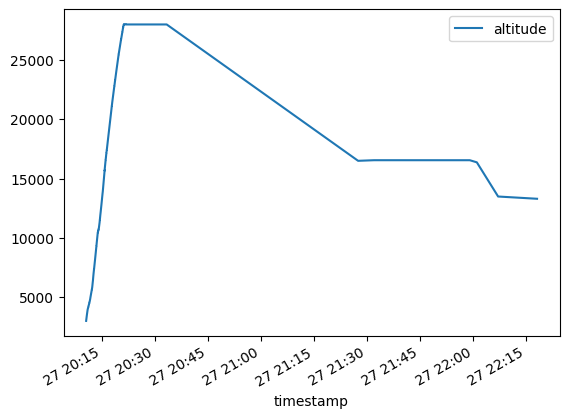

In [6]:
altitude = asset[flight_id][["timestamp", "altitude"]]
altitude.set_index("timestamp").plot()

In [7]:
from prc_challenge.utils.eda import print_dataframe_memory_footprint

print_dataframe_memory_footprint(asset[flight_id])

460.6 KB


# Weather

In [8]:
# uv add fastmeteo
# to presync the data, one should do this - DON'T DO IT
# uv run fastmeteo-sync --local-store data_weather --start 2025-04-01 --stop 2025-10-31

In [9]:
from fastmeteo.source import ArcoEra5

arcoera5_grid = ArcoEra5("data_weather/arcoera5/")
flight_new = arcoera5_grid.interpolate(asset[flight_id])
# downloading 4hrs worth of data took 180 seconds and weighs 1GB

In [10]:
flight_new

,timestamp,flight_id,typecode,latitude,longitude,altitude,groundspeed,track,vertical_rate,mach,TAS,CAS,source,u_component_of_wind,v_component_of_wind,temperature,specific_humidity
0,2025-05-27 20:10:28.207000017,prc781934023,B738,15.231008,120.579218,3000.1464,167.0,17.783888,2176.0,NaN,NaN,NaN,adsb,-6.785198,-0.106317,294.449112,0.015926
1,2025-05-27 20:10:28.921000004,prc781934023,B738,15.231400,120.579384,3025.1400,167.0,17.783888,2304.0,NaN,NaN,NaN,adsb,-6.827386,-0.105083,294.409747,0.015901
2,2025-05-27 20:10:29.400000095,prc781934023,B738,15.231753,120.579463,3050.1336,167.0,17.783888,2240.0,NaN,NaN,NaN,adsb,-6.869349,-0.103943,294.370168,0.015877
3,2025-05-27 20:10:30.187000036,prc781934023,B738,15.232224,120.579625,3075.1272,167.0,17.783888,2240.0,NaN,NaN,NaN,adsb,-6.911106,-0.102696,294.330881,0.015853
4,2025-05-27 20:10:30.526000023,prc781934023,B738,15.232590,120.579758,3075.1272,167.0,17.783888,2240.0,NaN,NaN,NaN,adsb,-6.910686,-0.102351,294.331333,0.015852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,2025-05-27 22:03:00.765000000,prc781934023,B738,26.004000,119.533000,15417.0000,NaN,NaN,NaN,NaN,NaN,225.0,acars,17.581466,3.298872,271.538652,0.006042
1905,2025-05-27 22:04:00.731000000,prc781934023,B738,26.129000,119.559000,14937.0000,NaN,NaN,NaN,NaN,NaN,225.0,acars,17.365459,5.080516,272.285760,0.006273
1906,2025-05-27 22:05:01.875000000,prc781934023,B738,26.257000,119.581000,14450.0000,NaN,NaN,NaN,NaN,NaN,225.0,acars,16.904972,6.830262,273.052324,0.006509
1907,2025-05-27 22:07:01.939000000,prc781934023,B738,26.512000,119.624000,13489.0000,NaN,NaN,NaN,NaN,NaN,225.0,acars,15.575068,9.344315,274.471941,0.006955
